In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

font_path = "/home/zhoujb/local/font/times.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
raw_phenos = pd.read_excel(os.path.join(RAW_PATH, "Phenotypes for GWAS-upload public database.xlsx"), index_col="Accessions")
raw_phenos = raw_phenos.drop(columns="ID")
raw_phenos = raw_phenos.replace({"-":np.nan})
raw_phenos = raw_phenos.dropna(axis=0, how="all")
raw_phenos = raw_phenos.rename(columns={'HZ-Pod length':'HZ-PL', 'GZ-Pod length':'GZ-PL', 
                                        'HZ Pod Sugar content (mg/g)':'HZ-PSugar','GZ Pod Sugar content  (mg/g)':'GZ-PSugar', 
                                        'HZ Pod Starch content(mg/g)':'HZ-PStarch','GZ Pod Strach Content (mg/g)':'GZ-PStarch', 
                                        'HZ Pod Protein content(g/Kg)':'HZ-PProtein','GZ Pod protein  (g/Kg)':'GZ-PProtein', 
                                        'HZ Seed Sugar (mg/g)':'HZ-SSuger','GZ Seed Sugar (mg/g)':'GZ-SSuger', 
                                        'HZ Seed Starch (mg/g)':'HZ-SStarch','GZ Seed Starch (mg/g)':'GZ-SStarch', 
                                        'HZ Seed Protein (g/kg)':'HZ-SProtein','GZ Seed Protein (g/kg)':'GZ-SProtein', 
                                        'Pod shattering':'PS'})

samples_score_info = pd.read_table(os.path.join(RES_PATH, "Samples_Score_Info.tsv"), index_col="Sample")
samples_score_info = samples_score_info.drop(columns=[ 'Class', 'Mis_Hap_Num'])
samples_score_info = samples_score_info.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                                        'Hap_Score.by_VL_pop':'VL_score',
                                                        'Hap_Score.by_G_pop':'G_score',
                                                        'Hap_Score.by_VC_pop':'VC_score'})
samples_score_info = samples_score_info[["Total_score"]]

inte_sample_list = list(set(raw_phenos.index).intersection(samples_score_info.index.to_list()))
raw_phenos = raw_phenos.loc[inte_sample_list]
samples_score_info = samples_score_info.loc[inte_sample_list]

detail_info = pd.read_excel(os.path.join(RAW_PATH, "Detail_information_344.xlsx"), index_col="Genotype No.")
detail_info["Type"] = detail_info["Types"].map({'Grain':"G", 'V-landrace':"VL", '-':"NA", 'V-cultivar':"VC"})
detail_info = detail_info.loc[inte_sample_list]
detail_info = detail_info[["Type"]]

phenos_add_score = pd.concat([raw_phenos, samples_score_info, detail_info], axis=1)

In [3]:
phenos_add_score

,HZ-PL,GZ-PL,HZ-PSugar,GZ-PSugar,HZ-PStarch,GZ-PStarch,HZ-PProtein,GZ-PProtein,HZ-SSuger,GZ-SSuger,HZ-SStarch,GZ-SStarch,HZ-SProtein,GZ-SProtein,PS,HZ-TSW,GZ-TSW,HZ-GNP,Total_score,Type
D673,32.575,NaN,10.310595,10.09710,11.431620,19.016200,26.384241,25.626899,87.874196,88.082402,365.635651,206.747099,254.103125,271.935,0.0,116.7273,NaN,10.4,77.601699,VL
D661,24.200,26.850000,10.669645,14.04780,10.001962,19.273892,25.776336,21.101089,90.777426,91.514109,371.334088,339.474547,260.425000,250.685,0.0,105.8934,152.2627,13.4,68.055075,VC
D447,40.600,39.200000,12.345752,7.91505,10.822232,14.464450,22.494619,20.639348,75.299807,81.864487,322.718837,206.991905,269.381250,268.915,0.0,125.4562,106.1714,16.2,90.727206,VL
D512,16.150,17.500000,11.265286,9.18840,11.509063,19.586975,28.999375,23.746574,79.944167,81.895984,253.970395,249.501473,219.165625,259.600,1.0,100.1901,123.3618,NaN,51.521325,G
D486,65.025,47.800000,14.310095,16.22400,10.672833,NaN,22.497784,NaN,87.907238,87.728812,364.752444,191.018428,277.812500,274.460,0.0,118.9149,152.8579,15.0,97.478839,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D537,29.550,21.400000,10.678162,10.65870,9.696175,16.111750,26.664383,22.319164,78.766780,77.167196,287.530508,259.635187,260.056250,239.575,0.0,132.0174,115.3618,13.8,81.170558,VL
D576,30.200,30.100000,9.860096,NaN,9.067873,NaN,26.966162,NaN,63.774682,85.300617,304.321018,197.559431,264.096875,276.390,0.0,137.8750,161.1000,17.7,85.204710,VL
D596,65.050,60.950000,11.479685,13.76700,13.082326,15.427783,21.594247,17.446596,58.162703,93.908178,378.720180,262.138410,263.756250,243.040,0.0,99.2143,146.2143,15.4,90.344890,VL
D598,19.100,16.611111,8.634156,12.10950,8.957061,15.119517,25.970587,20.844921,70.838789,81.021115,411.381137,316.299076,251.109375,264.790,0.0,125.3818,170.3333,14.5,68.909359,G


In [5]:
phenos_add_score.columns

Index(['HZ-PL', 'GZ-PL', 'HZ-PSugar', 'GZ-PSugar', 'HZ-PStarch', 'GZ-PStarch',
       'HZ-PProtein', 'GZ-PProtein', 'HZ-SSuger', 'GZ-SSuger', 'HZ-SStarch',
       'GZ-SStarch', 'HZ-SProtein', 'GZ-SProtein', 'PS', 'HZ-TSW', 'GZ-TSW',
       'HZ-GNP', 'Total_score', 'Type'],
      dtype='object')

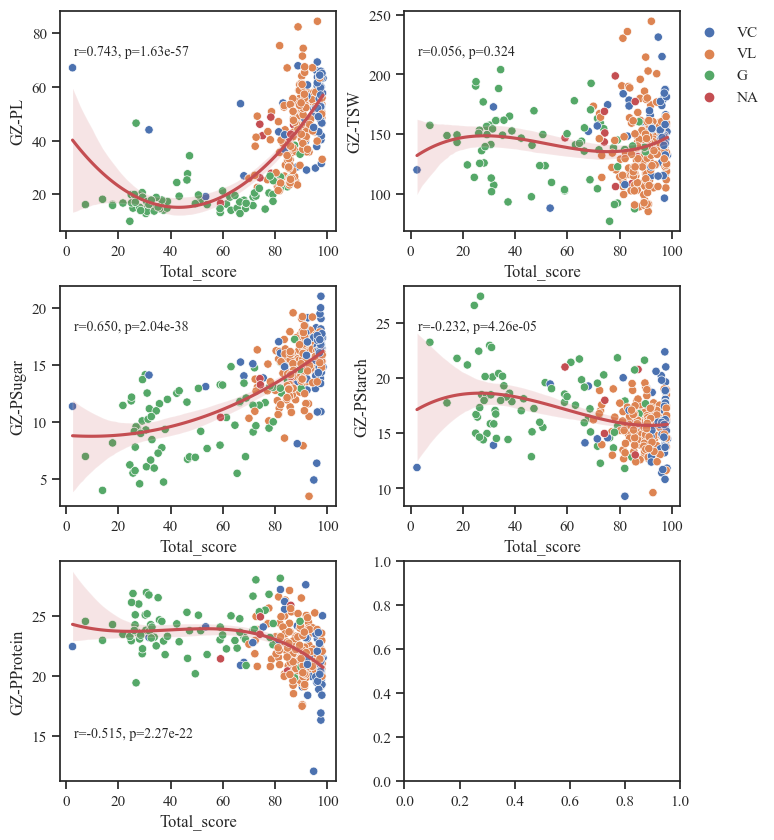

In [7]:
hz_col = ['GZ-PL', 'GZ-TSW', 'GZ-PSugar', 'GZ-PStarch', 'GZ-PProtein']
sns.set(font_scale=1, style="ticks")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
for num in range(len(hz_col)):
    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    
    if num == 1:
        sns.scatterplot(x="Total_score", y=hz_col[num], hue="Type", data=phenos_add_score, 
                        ax=axes[num//2, num%2], hue_order=['VC', 'VL', 'G', 'NA'])
        axes[num//2, num%2].legend(bbox_to_anchor=(1, 1), frameon=False)
    else:
        sns.scatterplot(x="Total_score", y=hz_col[num], hue="Type", data=phenos_add_score, 
                        ax=axes[num//2, num%2],  hue_order=['VC', 'VL', 'G', 'NA'], legend=None)
    sns.regplot(x="Total_score", y=hz_col[num], data=phenos_add_score, 
                ax=axes[num//2, num%2], ci=95, order=3, scatter=False, color="r")
    r, pvalue = stats.spearmanr(phenos_add_score["Total_score"].values, phenos_add_score[hz_col[num]].values, nan_policy="omit")

    anno_label = 'r={:.3f}, p={:.3g}'.format(r, pvalue)
    
    if num == 4:
        axes[num//2, num%2].text(.05, .2, anno_label, transform=axes[num//2, num%2].transAxes, font_properties=prop)
    else:
        axes[num//2, num%2].text(.05, .8, anno_label, transform=axes[num//2, num%2].transAxes, font_properties=prop)

plt.savefig(os.path.join(FIG_PATH, 'Fig_S1_GZ_corr_scatter.pdf'), format='pdf', bbox_inches='tight', transparent=True)